## Assignment Advanced Regression

#### Name :     Bhushan Date
#### Course:   Executive PG Programme in Machine Learning & AI 
#### Batch :    February 2022

In [1]:
# importing Essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Data
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

As seen in above data information many columns have Null values let us check the total null values in individual columns

In [5]:
df = df.drop(['Id'],axis=1) #droping id column as it has no significance

### Handling null values

In [6]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

Data of 81 rows not visible so sorting out columns having null values in descending order.

In [7]:
null = pd.DataFrame(round(df.isnull().sum() / len(df.index) * 100,2).sort_values(ascending=False),columns=["Percent"])
#calculating percentage of null values for eliminating
null_df = null[ null.Percent > 0]
null_df

,Percent
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


Deleting top 5 columns having null values i.e. above 30%

In [8]:
df = df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1) #eliminating these columns

In [9]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

### Imputing Missing values

Considering `LotFrontage` parameter

In [10]:
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:>

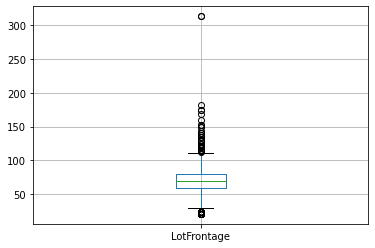

In [11]:
df.boxplot(column =['LotFrontage'])

As outliet is present in data inputing median vaules in place of null values & it is a numeric column

In [12]:
df.LotFrontage = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [13]:
df.LotFrontage.isnull().sum()

0

Similarly for `'GarageYrBlt'` parameter

In [14]:
df.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

<AxesSubplot:>

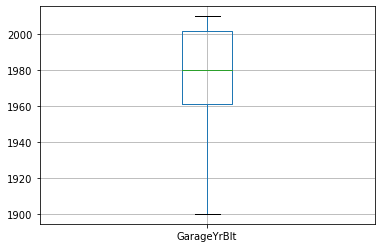

In [15]:
df.boxplot(column =['GarageYrBlt'])

In [16]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

In [17]:
df.LotFrontage.isnull().sum()

0

Now for `GarageCond` parameter

In [18]:
df.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

As GarageCond is a Categorical column imputing most common value i.e. mode

In [19]:
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [20]:
df.GarageCond.isnull().sum()

0

Repeating same to all the categorical columns 

In [21]:
for colmn in ('GarageType', 'GarageFinish','GarageQual','BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual','MasVnrArea', 'MasVnrType', 'Electrical'):
    df[colmn] = df[colmn].fillna(df[colmn].mode()[0])

Now re-verifying the null values

In [22]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Percent"])
null.index.name = "Parameters"
null_df = null[null["Percent"] > 0]
null_df

,Percent
Parameters,


As seen all the null values have been imputed

### Data Cleaning

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

As seen in the above description few columns have single value as data

In [24]:
print(df['PoolArea'].value_counts())

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64


This Feature PoolArea will not contribute much to our model as it has majority similar value hence eliminating this column.

In [25]:
df = df.drop(['PoolArea'],axis=1)

In [26]:
print(df['MiscVal'].value_counts())
print(df['3SsnPorch'].value_counts())

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64


This Feature MiscVal & 3SsnPorch will not contribute much to our model as it has majority similar value hence eliminating this column.

In [27]:
df = df.drop(['MiscVal','3SsnPorch'],axis=1)

In [28]:
df.shape

(1460, 72)

In [29]:
# categorical variable
cat_var = df.select_dtypes(include='object').columns
cat_var

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

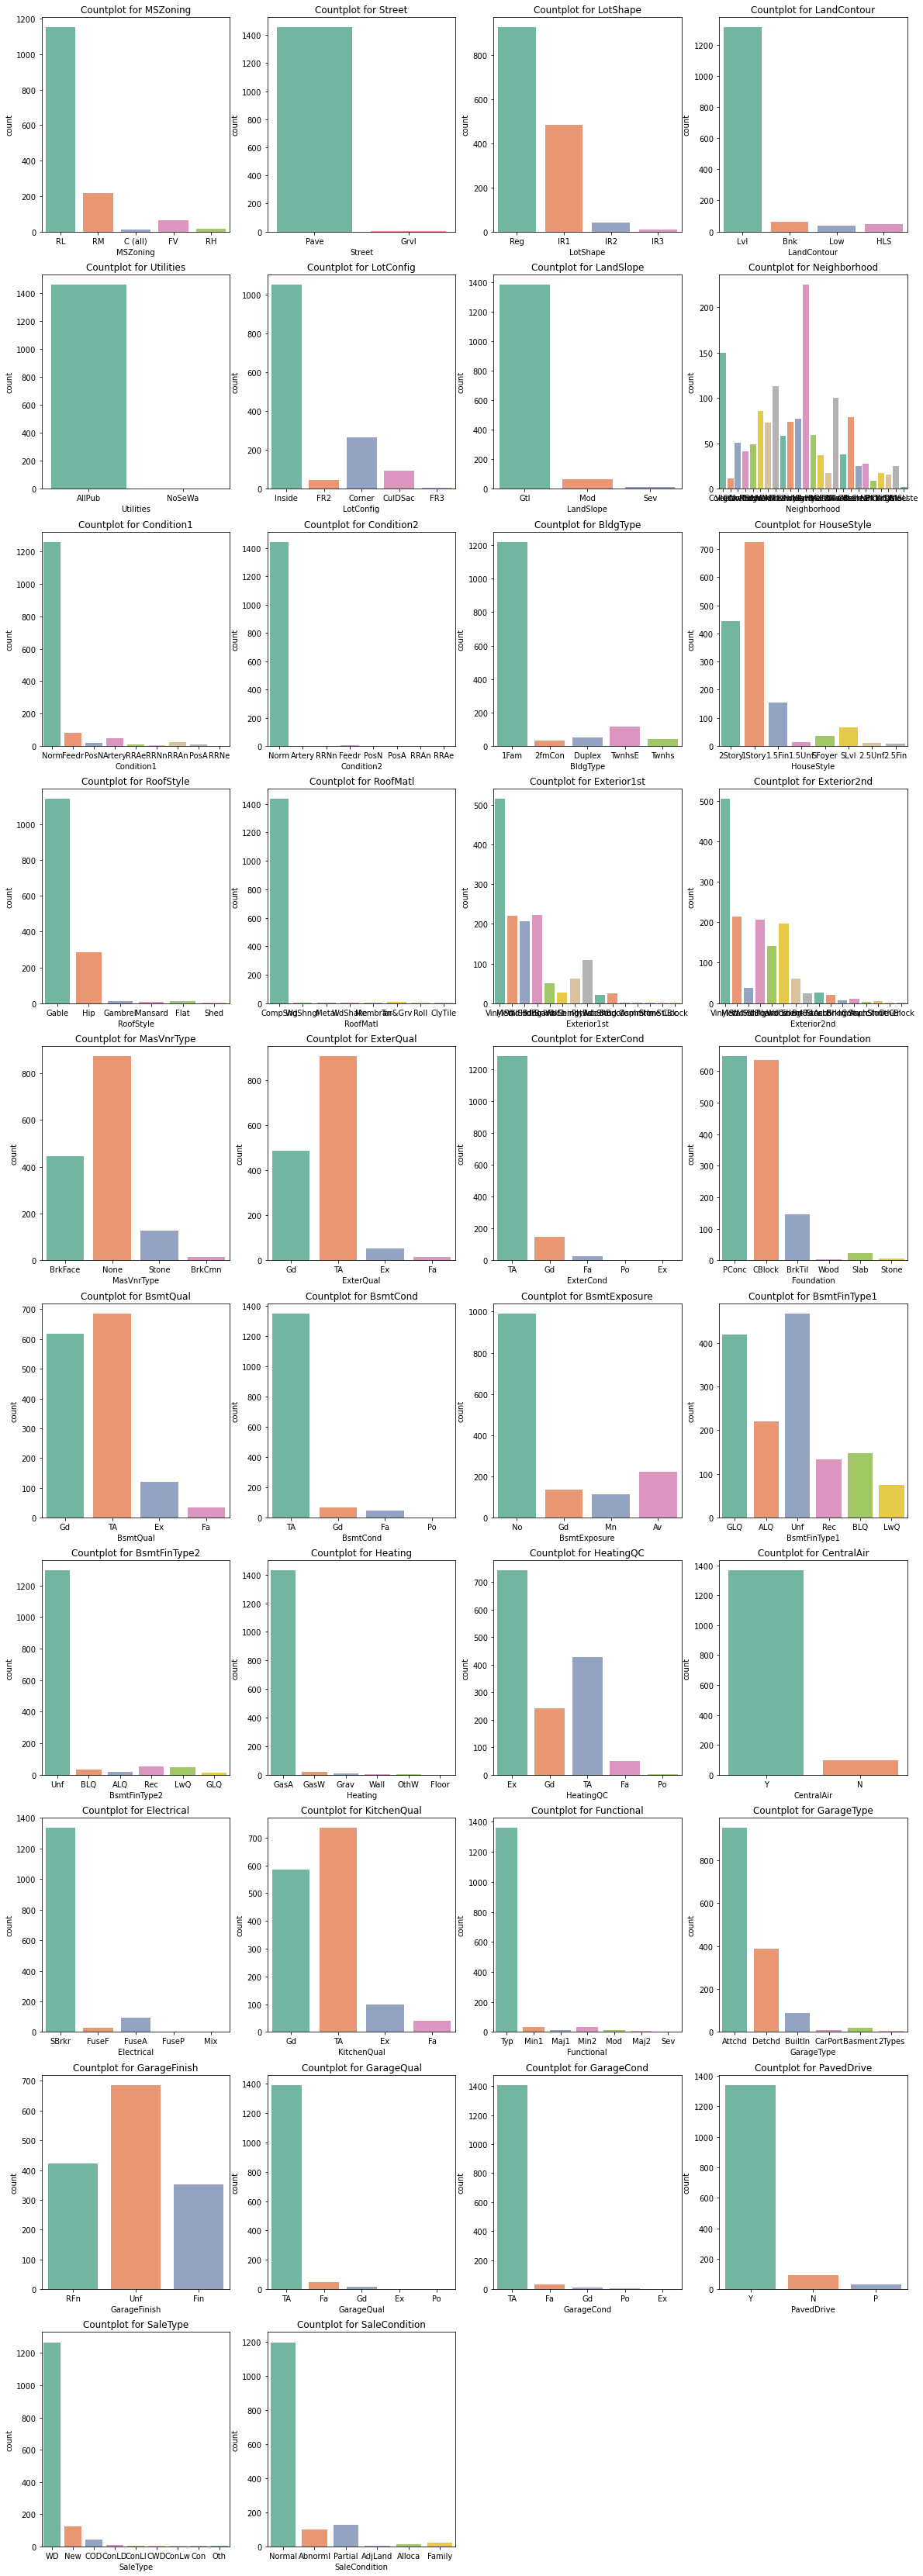

In [30]:
plt.figure(figsize=[20, 60])

for i, var in enumerate(cat_var,start=1):
    plt.subplot(10,4,i)
    sns.countplot(df[var], palette='Set2')
    plt.title(f"Countplot for {var}")

As seen from above plots
Following columns having majority similar value hence eliminating this column.

In [31]:
# numerical variables
num_var = df.select_dtypes(exclude='object').columns
num_var

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

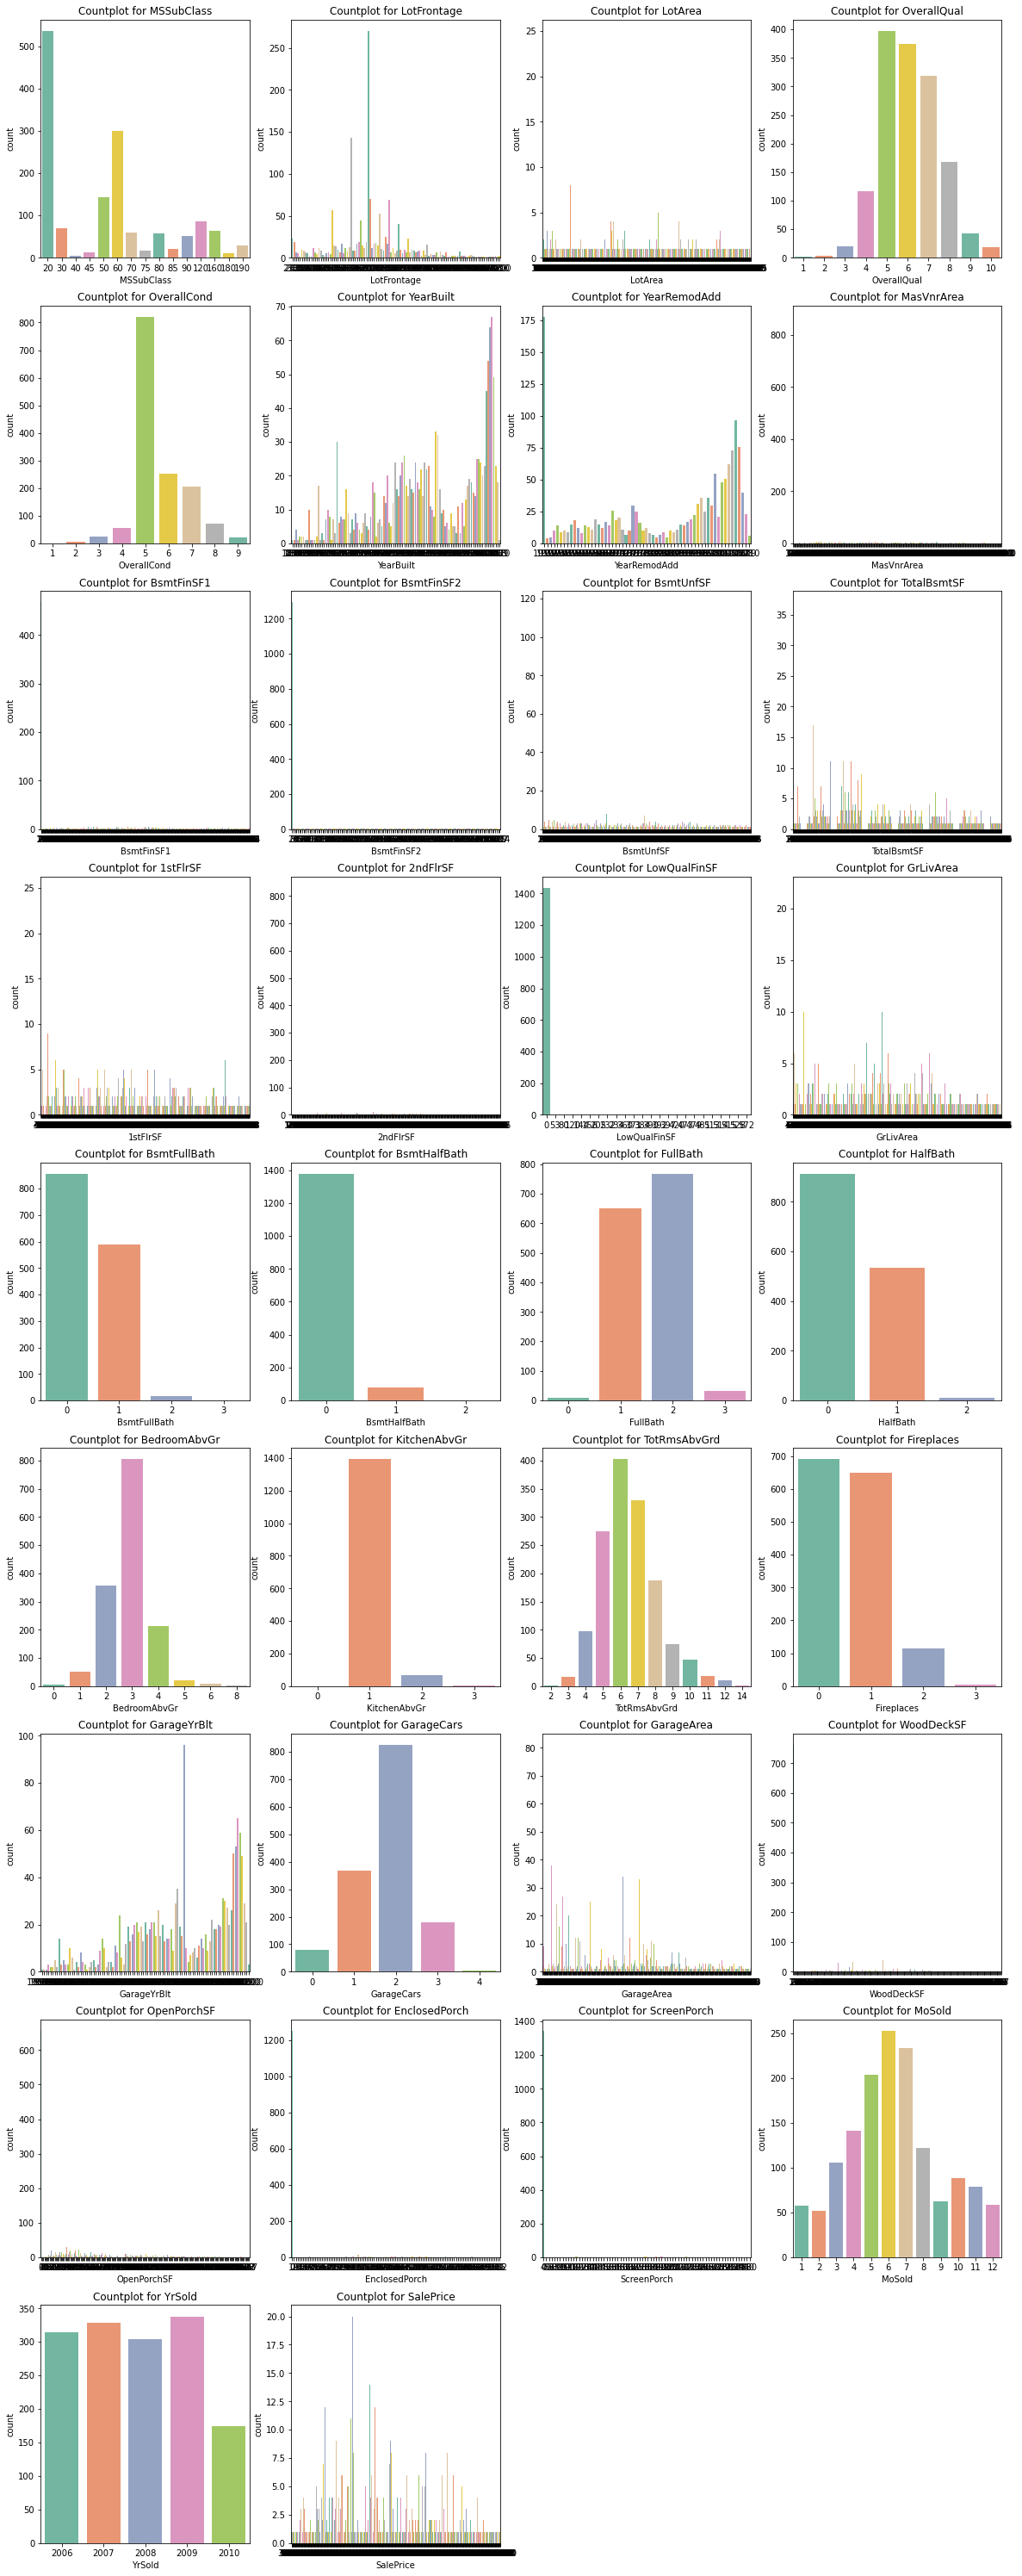

In [32]:
plt.figure(figsize=[20, 60])

for i, var in enumerate(num_var,start=1):
    plt.subplot(10,4,i)
    sns.countplot(df[var], palette='Set2')
    plt.title(f"Countplot for {var}")

In [33]:
df.drop(columns='Street', inplace=True)
df.drop(columns='Condition2', inplace=True)
df.drop(columns='RoofMatl', inplace=True)
df.drop(columns='Heating', inplace=True)
df.drop(columns='LowQualFinSF', inplace=True)
df.drop(columns='ScreenPorch', inplace=True)
df.drop(columns='Utilities', inplace=True)
df.drop(columns='KitchenAbvGr', inplace=True)

In [34]:
df.shape

(1460, 64)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  Exterior1st    1460 non-null   object 
 18  Exterior

## Outlier treatment

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
#Categorical columns
Categorical_var = df.select_dtypes(include='object').columns
print(len(Categorical_var))

33


In [38]:
#Numeric columns
Neumeric_var = df.select_dtypes(exclude='object').columns
print(len(Neumeric_var))

31


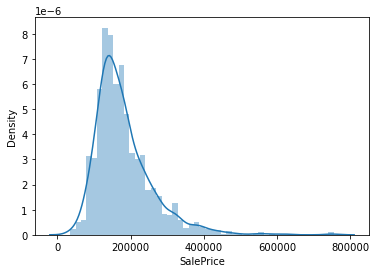

In [39]:
plt.figure()
sns.distplot(df['SalePrice'])
plt.show()

Using IQR method to eliminate outliers below 5% & above 95% of distribution

In [40]:
Q1 = df[Neumeric_var].quantile(0.05) 
Q3 = df[Neumeric_var].quantile(0.95)

IQR = Q3 - Q1
df = df[~((df[Neumeric_var] < (Q1 - 1.5 * IQR)) |(df[Neumeric_var] > (Q3 + 1.5 * IQR))).any(axis=1)]

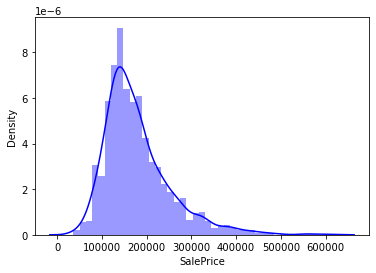

In [41]:
plt.figure()
sns.distplot(df['SalePrice'],color='b')
plt.show()

As seen in the data above the outliers have been treated well & now proceeding with data 

In [42]:
df.shape

(1425, 64)

As seen the outliers have been treated and 102 rows have been eliminated.

<Figure size 1440x1080 with 0 Axes>

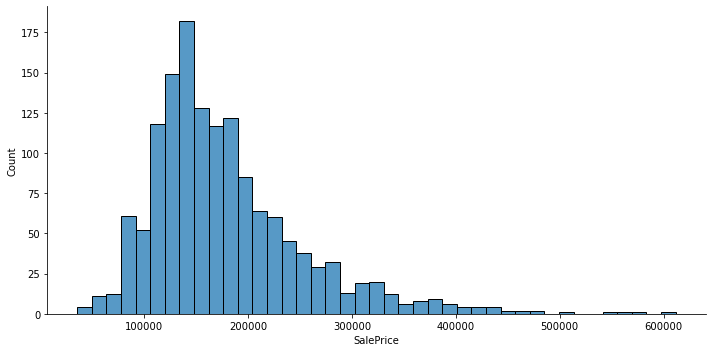

In [43]:
plt.figure(figsize=[20,15])
sns.displot(df['SalePrice'], aspect=2)
plt.show()

As seen from above graph the target variable SalePrice is right skewed

#### Checking skew value of salesprice

In [44]:
df['SalePrice'].skew()

1.5211661881010234

As skew is greater then 1 so sales price is highly skewed

####  Checking Kurtosis value of SalePrice

In [45]:
df['SalePrice'].kurtosis()

3.547154547973838

Kurtosis seems to be normal as the value of Kurtosis is 3 for normal distribution

<Figure size 1440x1080 with 0 Axes>

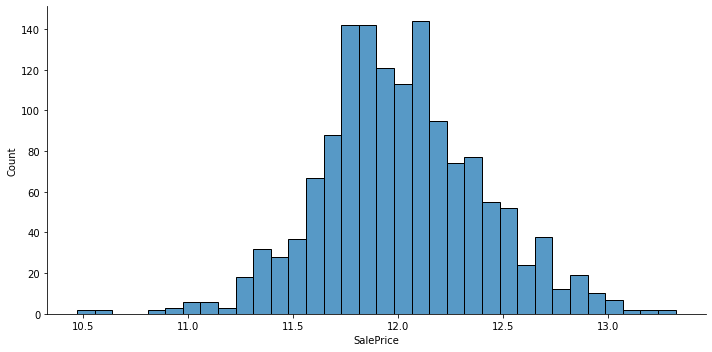

In [46]:
plt.figure(figsize=[20,15])
sns.displot(np.log(df['SalePrice']), aspect=2)
plt.show()

Hence tranforming values to Logarithemic values

In [47]:
df['Trans_SalePrice'] = np.log(df['SalePrice'])

<Figure size 1440x1080 with 0 Axes>

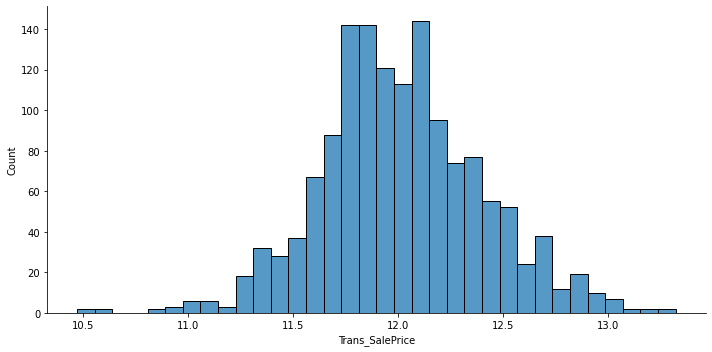

In [48]:
plt.figure(figsize=[20,15])
sns.displot(df['Trans_SalePrice'], aspect=2)
plt.show()

In [49]:
df['Trans_SalePrice'].skew()

0.08943894724671275

As seen the value of Skew is now far less than 1 the data is not Skewed

In [50]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Trans_SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,Y,0,61,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,Y,298,0,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,Y,0,42,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,Y,0,35,272,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,Y,192,84,0,12,2008,WD,Normal,250000,12.429216


In [51]:
df.shape

(1425, 65)

In [52]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice', 'Trans_Sale

## EDA & Visualization

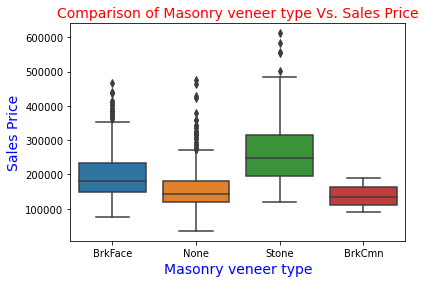

In [53]:
sns.boxplot(data = df , x= 'MasVnrType', y='SalePrice')
plt.xlabel('Masonry veneer type', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('Sales Price',  fontdict = {'size':14, 'color' : 'b'})
plt.title("Comparison of Masonry veneer type Vs. Sales Price",fontdict = {'size':14, 'color' : 'r'})
plt.show()

### Observation
Masonry veneer type stone has comparitavily higher sales price.

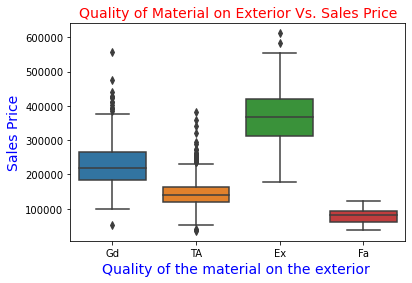

In [54]:
sns.boxplot(data = df , x= 'ExterQual', y='SalePrice')
plt.xlabel('Quality of the material on the exterior ', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('Sales Price',  fontdict = {'size':14, 'color' : 'b'})
plt.title("Quality of Material on Exterior Vs. Sales Price",fontdict = {'size':14, 'color' : 'r'})
plt.show()

### Observation
More the Quality of the material on the exterior more is the sale price.

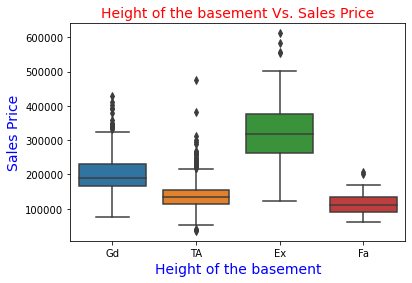

In [55]:
sns.boxplot(data = df , x= 'BsmtQual', y='SalePrice')
plt.xlabel('Height of the basement', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('Sales Price',  fontdict = {'size':14, 'color' : 'b'})
plt.title("Height of the basement Vs. Sales Price",fontdict = {'size':14, 'color' : 'r'})
plt.show()

### Observation
More the Quality of the basement more is the sale price.

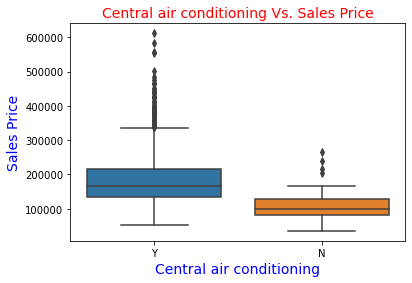

In [56]:
sns.boxplot(data = df , x= 'CentralAir', y='SalePrice')
plt.xlabel('Central air conditioning', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('Sales Price',  fontdict = {'size':14, 'color' : 'b'})
plt.title("Central air conditioning Vs. Sales Price",fontdict = {'size':14, 'color' : 'r'})
plt.show()

### Observation
Houses with central air conditioning have higher sale price.

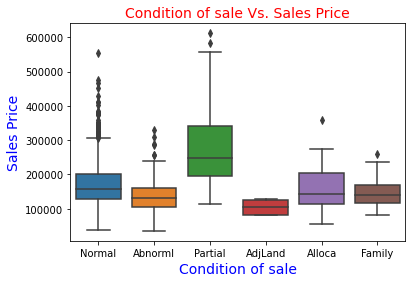

In [57]:
sns.boxplot(data = df , x= 'SaleCondition', y='SalePrice')
plt.xlabel('Condition of sale', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('Sales Price',  fontdict = {'size':14, 'color' : 'b'})
plt.title("Condition of sale Vs. Sales Price",fontdict = {'size':14, 'color' : 'r'})
plt.show()

### Observation
House which is partially completed has higer average sales price compared to others

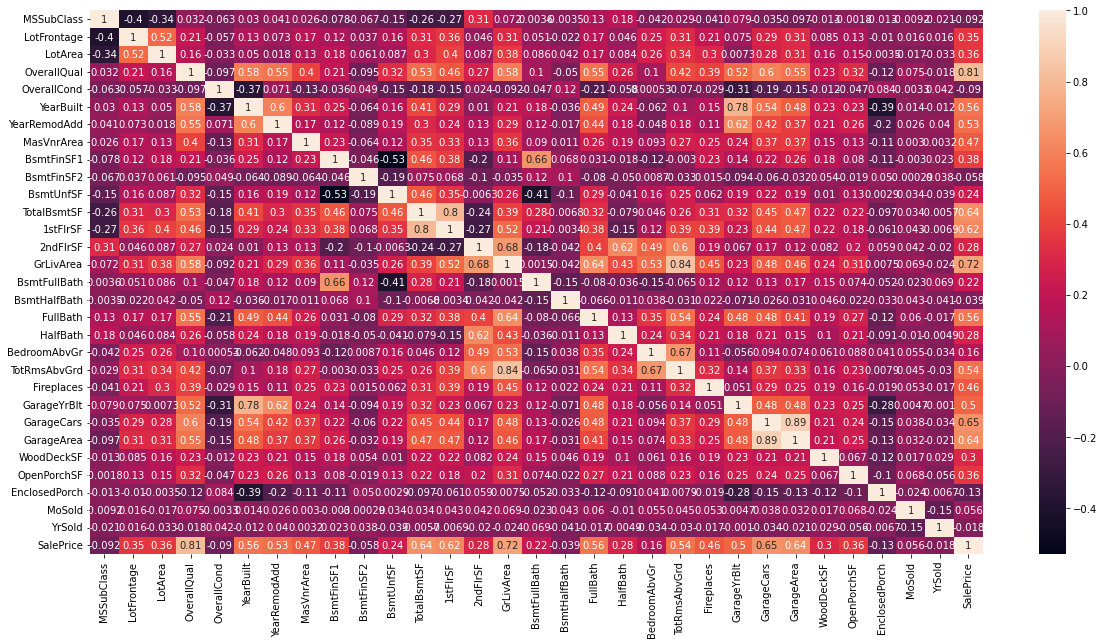

In [58]:
plt.figure(figsize=[20,10])
corr = df.drop(columns='Trans_SalePrice', axis=1)
corr = corr.corr()
mask=np.triu(np.ones_like(corr)) # Masking upper half of the triangle
sns.heatmap(corr, annot=True)
plt.show()

- GarageArea and GarageCars have 0.89 coorelation factor i.e. highly coorelated
- GrLivArea and TotaRmsAvbGrad have 0.84 coorelation factor i.e. highly coorelated
- OverallQual and SalePrice heve higher correlation factor i.e. o.81
- GarageYrBlt and YearBuilt heve higher correlation factor i.e. o.78

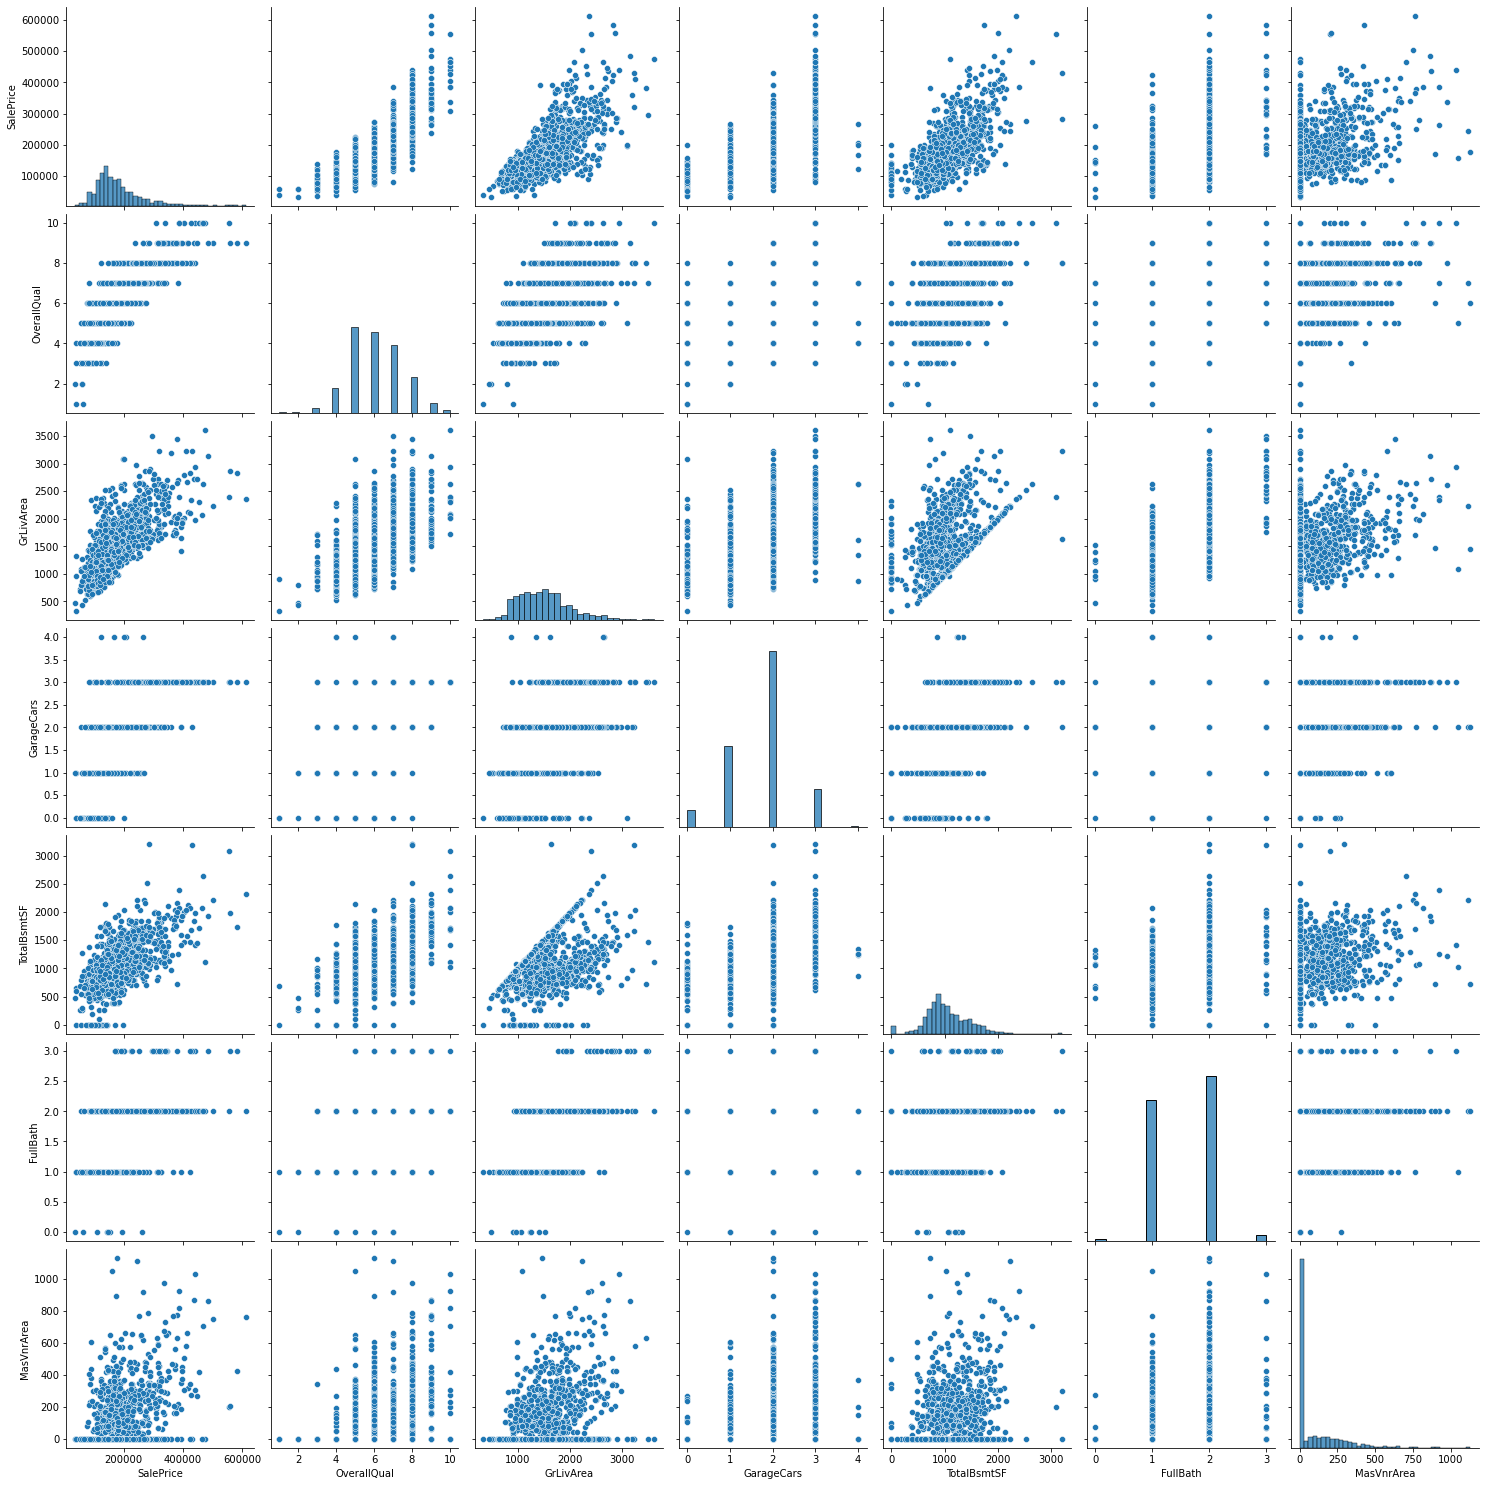

In [59]:
columns = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','MasVnrArea']
sns.pairplot(df[columns], size=3)
plt.show()

- TotalBasementSF, GrLivingArea & OverallQual are linearly correlated with SalePrice
- TotalBasementSF and GrLivingArea have a positive correlation

## Dummy Variable

For building model we need numeric variables hence we create dummy variables for converting categorical variables into numeric variables

In [60]:
cat = df.select_dtypes(include='object').columns
cat

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [61]:
# Convert categorical value into Dummy variable
df=pd.get_dummies(df,drop_first=True)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


Now all features of dataframe have been converted into numeric data moving further to split data for training & testing model

## Split data into Test & Train data

In [62]:
y = df['Trans_SalePrice']
df.drop(['SalePrice', 'Trans_SalePrice'], axis =1, inplace=True)
X = df

In [63]:
X.shape

(1425, 205)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [66]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
106,30,60.0,10800,4,7,1885,1995,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
857,60,65.0,8125,6,5,1994,1995,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1006,20,69.0,12155,6,3,1970,1970,0.0,1237,0,...,0,0,0,0,1,0,0,0,1,0
1382,70,60.0,7200,7,7,1920,1950,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1386,60,80.0,16692,7,5,1978,1978,184.0,790,469,...,0,0,0,0,1,0,0,0,1,0


In [67]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (954, 205)
X_test shape (471, 205)
y_train shape (954,)
y_test shape (471,)


## Scaling of Numeric Variables

In [68]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,...,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000
mean,55.697065,69.279874,9748.810273,6.056604,5.573375,1970.875262,1983.953878,90.971698,433.957023,38.985325,...,0.002096,0.002096,0.075472,0.001048,0.878407,0.002096,0.007338,0.010482,0.835430,0.076520
std,40.943252,18.750873,3988.155596,1.357016,1.136702,29.871958,20.826822,149.719704,422.828120,132.884204,...,0.045763,0.045763,0.264289,0.032376,0.326987,0.045763,0.085389,0.101898,0.370987,0.265968
min,20.000000,21.000000,1491.000000,1.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1972.000000,1992.000000,0.000000,384.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,78.000000,11494.500000,7.000000,6.000000,2000.000000,2003.000000,149.500000,713.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,153.000000,35133.000000,10.000000,9.000000,2010.000000,2010.000000,870.000000,2188.000000,972.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954 entries, 106 to 816
Columns: 205 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(27), uint8(175)
memory usage: 394.1 KB


In [70]:
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold'],
      dtype='object')

In [71]:
num_vars= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold']
X_train[num_vars].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold
106,30,60.0,10800,4,7,1885,1995,0.0,0,0,...,6,0,1954.0,1,273,0,0,0,8,2007
857,60,65.0,8125,6,5,1994,1995,0.0,0,0,...,6,1,1994.0,2,343,0,36,0,3,2009
1006,20,69.0,12155,6,3,1970,1970,0.0,1237,0,...,7,1,1970.0,2,484,0,0,0,3,2007
1382,70,60.0,7200,7,7,1920,1950,0.0,0,0,...,8,0,1989.0,2,576,36,0,221,10,2006
1386,60,80.0,16692,7,5,1978,1978,184.0,790,469,...,12,2,1978.0,2,564,0,112,0,7,2006


In [72]:
#Scaling using MinMax scalar
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [73]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [74]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
106,0.058824,0.295455,0.276708,0.333333,0.75,0.038462,0.750000,0.000000,0.000000,0.00000,...,0,0,0,0,1,0,0,0,1,0
857,0.235294,0.333333,0.197194,0.555556,0.50,0.876923,0.750000,0.000000,0.000000,0.00000,...,0,0,0,0,1,0,0,0,1,0
1006,0.000000,0.363636,0.316985,0.555556,0.25,0.692308,0.333333,0.000000,0.565356,0.00000,...,0,0,0,0,1,0,0,0,1,0
1382,0.294118,0.295455,0.169699,0.666667,0.75,0.307692,0.000000,0.000000,0.000000,0.00000,...,0,0,0,0,1,0,0,0,1,0
1386,0.235294,0.446970,0.451846,0.666667,0.50,0.753846,0.466667,0.211494,0.361060,0.48251,...,0,0,0,0,1,0,0,0,1,0


In [75]:
print(X_train.shape)
print(X_test.shape)

(954, 205)
(471, 205)


## Building model

### 1 Model Building using Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

In [77]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [78]:
coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff

,Coefficients
MSSubClass,-0.097028
LotFrontage,0.034752
LotArea,0.193621
OverallQual,0.383917
OverallCond,0.278249
...,...
SaleCondition_AdjLand,0.111313
SaleCondition_Alloca,-0.019806
SaleCondition_Family,0.010248
SaleCondition_Normal,0.089188


In [79]:
# Intercept
regressor.intercept_

10.373093987810414

In [80]:
# predictions on test data 
y_pred = regressor.predict(X_test)

In [81]:
# Compairing actual and predicted 
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_result

,Actual,Predicted
1294,11.652687,11.694397
994,12.729321,12.829161
418,11.744037,11.512948
426,12.524526,12.292369
695,12.078239,12.008516
...,...,...
541,12.421184,12.420113
1167,12.061047,12.202703
1081,11.798104,11.716324
270,12.491252,12.482506


In [82]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric.append(mse_test_lr**0.5)

Train r2 score is : 0.9487028585453585
Test r2 score is : -8.764933138193196e+17
Train RSS score is : 7.227948575432112
Test RSS score is : 6.623158059607049e+19
Train MSE score is : 0.007576466011983346
Test MSE score is : 1.4061906708295221e+17


As seen in above the R2 of test data is very less than R2 of train data hence need to perform feature elimination.

Using RFE function of Python for feature elimination

### Model building using RFE

In [83]:
from sklearn.feature_selection import RFE

In [84]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=205)

In [85]:
# LinearRegression 
lm = LinearRegression()
lm.fit(X_train,y_train)

# RFE
rfe = RFE(lm,50)
# Running RFE
rfe = rfe.fit(X_train,y_train)

In [86]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 47),
 ('LotFrontage', False, 9),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 6),
 ('MasVnrArea', False, 95),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 145),
 ('2ndFlrSF', False, 78),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 27),
 ('BsmtHalfBath', False, 54),
 ('FullBath', False, 116),
 ('HalfBath', False, 35),
 ('BedroomAbvGr', False, 104),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', False, 68),
 ('GarageCars', False, 17),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 70),
 ('OpenPorchSF', False, 13),
 ('EnclosedPorch', False, 12),
 ('MoSold', False, 120),
 ('YrSold', False, 72),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 88),
 ('LotShape_IR3', False, 56),
 ('LotShape_Reg',

In [87]:
# Looking at the 50 variables selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_BrDale', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_StoneBr', 'Condition1_RRAe',
       'BldgType_Duplex', 'Exterior1st_BrkComm', 'Exterior2nd_Other',
       'ExterQual_Fa', 'Foundation_Wood', 'BsmtCond_Po', 'BsmtExposure_Gd',
       'Electrical_Mix', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Min1', 'Functional_Min2', 'Functional_Mod',
       'Functional_Typ', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po',
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po',
       'GarageCond_TA', 'SaleType_CWD', 'SaleType_ConLI', 'SaleType_Oth',
       'SaleCondition_AdjLand', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')

In [88]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'YearRemodAdd', 'MasVnrArea', '1stFlrSF',
       '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'GarageFinish_Unf', 'PavedDrive_P', 'PavedDrive_Y', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLw', 'SaleType_New', 'SaleType_WD',
       'SaleCondition_Alloca', 'SaleCondition_Family'],
      dtype='object', length=155)

In [89]:
X_train_rfe = X_train[col]

In [90]:
X_train_rfe.shape

(954, 50)

In [91]:
import statsmodels.api as sm # importing required stats model library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
# Functions to build for ease of calling
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [93]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:        Trans_SalePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     245.6
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:41:28   Log-Likelihood:                 827.93
No. Observations:                 954   AIC:                            -1556.
Df Residuals:                     904   BIC:                            -1313.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.34

In [94]:
HighVIF = checkVIF(X_train_new)

In [95]:
HighVIF[ HighVIF['VIF'] >=5 ]

,Features,VIF
6,BsmtFinSF2,inf
8,TotalBsmtSF,inf
7,BsmtUnfSF,inf
5,BsmtFinSF1,inf
0,const,901.76
44,GarageCond_TA,56.59
40,GarageQual_TA,45.68
41,GarageCond_Fa,37.17
37,GarageQual_Fa,33.83
15,MSZoning_RL,32.89


In [96]:
highVIF_columns = list(HighVIF[ HighVIF['VIF'] >=5 ].Features.values)

In [97]:
len(highVIF_columns)

20

In [98]:
highVIF_columns.remove('const')

In [99]:
len(highVIF_columns)

19

In [100]:
highVIF_columns

['BsmtFinSF2',
 'TotalBsmtSF',
 'BsmtUnfSF',
 'BsmtFinSF1',
 'GarageCond_TA',
 'GarageQual_TA',
 'GarageCond_Fa',
 'GarageQual_Fa',
 'MSZoning_RL',
 'MSZoning_RM',
 'GarageCond_Po',
 'GarageCond_Gd',
 'MSZoning_FV',
 'GarageQual_Gd',
 'Functional_Typ',
 'KitchenQual_TA',
 'GarageQual_Po',
 'GrLivArea',
 'KitchenQual_Gd']

In [101]:
X_train_rfe.drop(highVIF_columns, axis=1, inplace=True)

In [102]:
X_train_rfe.shape

(954, 31)

In [103]:
X_train_rfe.head()

,LotArea,OverallQual,OverallCond,YearBuilt,TotRmsAbvGrd,Fireplaces,GarageArea,MSZoning_RH,Neighborhood_BrDale,Neighborhood_Crawfor,...,KitchenQual_Fa,Functional_Min1,Functional_Min2,Functional_Mod,SaleType_CWD,SaleType_ConLI,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial
106,0.276708,0.333333,0.75,0.038462,0.4,0.000000,0.196403,0,0,0,...,0,0,0,0,0,0,0,0,1,0
857,0.197194,0.555556,0.50,0.876923,0.4,0.333333,0.246763,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1006,0.316985,0.555556,0.25,0.692308,0.5,0.333333,0.348201,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1382,0.169699,0.666667,0.75,0.307692,0.6,0.000000,0.414388,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1386,0.451846,0.666667,0.50,0.753846,1.0,0.666667,0.405755,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Final Model

In [104]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_lm)
lm = lr.fit()
lm.params

const                    10.387888
LotArea                   0.355422
OverallQual               0.879337
OverallCond               0.327640
YearBuilt                 0.525440
TotRmsAbvGrd              0.560753
Fireplaces                0.193002
GarageArea                0.336510
MSZoning_RH               0.058117
Neighborhood_BrDale      -0.216872
Neighborhood_Crawfor      0.159431
Neighborhood_MeadowV     -0.151457
Neighborhood_StoneBr      0.174774
Condition1_RRAe          -0.160965
BldgType_Duplex          -0.130895
Exterior1st_BrkComm      -0.529472
Exterior2nd_Other        -0.129165
ExterQual_Fa             -0.118898
Foundation_Wood          -0.084902
BsmtCond_Po               0.260834
BsmtExposure_Gd           0.106783
Electrical_Mix           -0.514830
KitchenQual_Fa           -0.067995
Functional_Min1          -0.045755
Functional_Min2           0.005807
Functional_Mod            0.017371
SaleType_CWD              0.106293
SaleType_ConLI           -0.143726
SaleType_Oth        

In [105]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Trans_SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     218.6
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:41:29   Log-Likelihood:                 570.98
No. Observations:                 954   AIC:                            -1078.
Df Residuals:                     922   BIC:                            -922.4
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.3879      0.037    278.682      0.000      10.315      10.461
LotArea                   0.3554      0.044      8.073      0.000       0.269       0.442
OverallQual               0.8793      0.049     18.043      0.000       0.784       0.975
OverallCond               0.3276      0.037      8.951      0.000       0.256       0.399
YearBuilt                 0.5254      0.029     18.005      0.000       0.468       0.583
TotRmsAbvGrd              0.5608      0.035     15.936      0.000       0.492       0.630
Fireplaces                0.1930      0.024      7.896      0.000       0.145       0.241
GarageArea                0.3365      0.039      8.605      0.000       0.260       0.413
MSZoning_RH               0.0581      0.042      1.382      0.167      -0.024       0.141
Neighborhood_BrDale      -0.2169      0.049     -4.399      0.000      -0.314      -0.120
Neighborhood_Crawfor      0.1594      0.024      6.689      0.000       0.113       0.206
Neighborhood_MeadowV     -0.1515      0.041     -3.708      0.000      -0.232      -0.071
Neighborhood_StoneBr      0.1748      0.036      4.807      0.000       0.103       0.246
Condition1_RRAe          -0.1610      0.046     -3.500      0.000      -0.251      -0.071
BldgType_Duplex          -0.1309      0.025     -5.225      0.000      -0.180      -0.082
Exterior1st_BrkComm      -0.5295      0.144     -3.679      0.000      -0.812      -0.247
Exterior2nd_Other        -0.1292      0.141     -0.915      0.360      -0.406       0.148
ExterQual_Fa             -0.1189      0.044     -2.696      0.007      -0.205      -0.032
Foundation_Wood          -0.0849      0.079     -1.079      0.281      -0.239       0.070
BsmtCond_Po               0.2608      0.145      1.804      0.072      -0.023       0.545
BsmtExposure_Gd           0.1068      0.017      6.108      0.000       0.072       0.141
Electrical_Mix           -0.5148      0.199     -2.591      0.010      -0.905      -0.125
KitchenQual_Fa           -0.0680      0.029     -2.315      0.021      -0.126      -0.010
Functional_Min1          -0.0458      0.033     -1.396      0.163      -0.110       0.019
Functional_Min2           0.0058      0.028      0.206      0.837      -0.049       0.061
Functional_Mod            0.0174      0.046      0.377      0.706      -0.073       0.108
SaleType_CWD              0.1063      0.138      0.773      0.440      -0.164       0.376
SaleType_ConLI           -0.1437      0.096     -1.498      0.135      -0.332       0.045
SaleType_Oth              0.1341      0.136      0.983      0.326      -0.134       0.402
SaleCondition_AdjLand     0.1266      0.102      1.246      0.213      -0.073       0.326
SaleCondition_Normal      0.0780      0.016      4.788      0.000       0.046       0.110
SaleCondition_Partial  

In [106]:
print(X_train_rfe.shape)
print(X_test.shape)

(954, 31)
(471, 205)


In [107]:
temp = X_train_rfe.columns

In [108]:
X_test_new = X_test[temp]

In [109]:
X_test_new.shape

(471, 31)

In [110]:
X_test_new = sm.add_constant(X_test_new)

In [111]:
X_test_new.shape

(471, 32)

Building final model & calculationg R2, RSS & MSE

In [112]:
y_pred_train = lm.predict(X_train_lm)
y_pred_test = lm.predict(X_test_new)

metric_lr = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train R2 score is : {r2_train_lr}")
metric_lr.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test R2 score is : {r2_test_lr}")
metric_lr.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_lr.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_lr.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_lr.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_lr.append(mse_test_lr**0.5)

Train R2 score is : 0.8802464033647721
Test R2 score is : 0.8388795164666258
Train RSS score is : 16.8737051160606
Test RSS score is : 12.174952304334742
Train MSE score is : 0.017687321924591822
Test MSE score is : 0.025849155635530238


As seen in above R2 od train data is nearly same as test data.

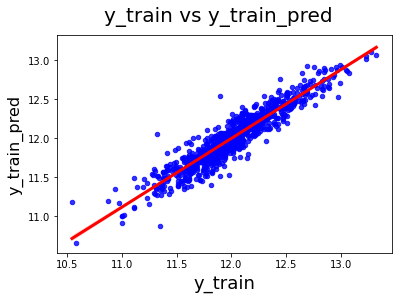

In [113]:
fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred)
sns.regplot(x=y_train,y=y_pred_train, scatter_kws = {"color": 'blue',"s": 20}, line_kws = {"color": 'red', "lw": 3})
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              
plt.xlabel('y_train', fontsize = 18)                          
plt.ylabel('y_train_pred', fontsize = 16)
plt.show()

### Model Evaluation

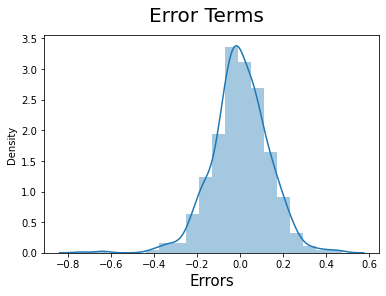

In [114]:
res = y_train - y_pred_train
fig = plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)
plt.show()

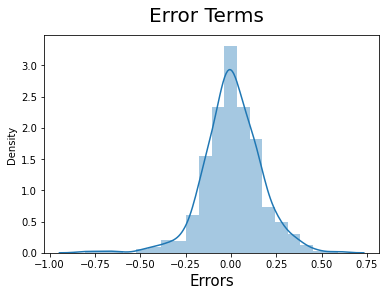

In [115]:
res = y_test - y_pred_test
fig = plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)
plt.show()

Linear Regression

- REsidual are around 0 
- train and test prediction are linear to actual values
- train r2 score is 0.88
- test r2 score is 0.83

In [116]:
names = X_train_rfe.columns
print(len(names))
print(list(names))

31
['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MSZoning_RH', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_StoneBr', 'Condition1_RRAe', 'BldgType_Duplex', 'Exterior1st_BrkComm', 'Exterior2nd_Other', 'ExterQual_Fa', 'Foundation_Wood', 'BsmtCond_Po', 'BsmtExposure_Gd', 'Electrical_Mix', 'KitchenQual_Fa', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'SaleType_CWD', 'SaleType_ConLI', 'SaleType_Oth', 'SaleCondition_AdjLand', 'SaleCondition_Normal', 'SaleCondition_Partial']


## LASSO Reg

In [117]:
# importing library
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score

In [118]:
X_train = X_train[names]
X_test = X_test[names]

In [119]:
print(X_train.shape)
print(X_test.shape)

(954, 31)
(471, 31)


In [120]:
params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [121]:
lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [122]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008756,0.005007,0.006288,0.003854,0.0001,{'alpha': 0.0001},-0.103476,-0.096250,-0.103404,-0.124232,...,-0.106582,0.009371,1,-0.101400,-0.102693,-0.100863,-0.096180,-0.100667,-0.100360,0.002207
1,0.009788,0.001454,0.002420,0.003013,0.001,{'alpha': 0.001},-0.103996,-0.098353,-0.103755,-0.126634,...,-0.107685,0.009790,2,-0.103980,-0.104735,-0.104050,-0.098492,-0.103844,-0.103020,0.002285
2,0.007574,0.003743,0.006197,0.003529,0.01,{'alpha': 0.01},-0.129353,-0.134616,-0.134431,-0.159023,...,-0.138322,0.010535,3,-0.136910,-0.137565,-0.136862,-0.132980,-0.136460,-0.136155,0.001627
3,0.005440,0.003435,0.001825,0.003403,0.05,{'alpha': 0.05},-0.267200,-0.301937,-0.275983,-0.318357,...,-0.286265,0.020415,4,-0.287568,-0.284771,-0.289741,-0.285628,-0.282515,-0.286045,0.002459
4,0.010573,0.003859,0.000705,0.001176,0.1,{'alpha': 0.1},-0.281848,-0.311387,-0.287224,-0.323616,...,-0.297537,0.016843,5,-0.301214,-0.294331,-0.299982,-0.290951,-0.300753,-0.297446,0.004085


In [123]:
optimalvalue_lasso = model_cv.best_params_['alpha']
optimalvalue_lasso

0.0001

In [124]:
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [125]:
lasso.coef_ # viewing coefficients

array([ 3.52884536e-01,  8.81071458e-01,  3.17629017e-01,  5.23373421e-01,
        5.56838626e-01,  1.94519244e-01,  3.30604446e-01,  4.43560057e-02,
       -2.07142341e-01,  1.60519594e-01, -1.44788613e-01,  1.62096575e-01,
       -1.48617334e-01, -1.24648894e-01, -4.21748088e-01, -2.02021079e-02,
       -9.82410212e-02, -5.11133397e-02,  3.18448882e-02,  1.08005414e-01,
       -1.97049356e-01, -5.91992353e-02, -4.04909029e-02,  3.10200539e-04,
        0.00000000e+00,  8.65436508e-03, -9.39674155e-02,  3.62426446e-02,
        6.35438167e-02,  7.63697323e-02,  1.45472051e-01])

In [126]:
df_lasso = pd.DataFrame(index=X_train.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso.coef_
df_lasso

,Lasso
LotArea,0.352885
OverallQual,0.881071
OverallCond,0.317629
YearBuilt,0.523373
TotRmsAbvGrd,0.556839
Fireplaces,0.194519
GarageArea,0.330604
MSZoning_RH,0.044356
Neighborhood_BrDale,-0.207142
Neighborhood_Crawfor,0.160520


Lasso Model Evaluation

In [127]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_l = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train R2 score is : {r2_train_lr}")
metric_l.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test R2 score is : {r2_test_lr}")
metric_l.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_l.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_l.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_l.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_l.append(mse_test_lr**0.5)

Train R2 score is : 0.8794084741982939
Test R2 score is : 0.8415842171673225
Train RSS score is : 16.991772297845255
Test RSS score is : 11.970573560513131
Train MSE score is : 0.017811082073213056
Test MSE score is : 0.025415230489412168


## Ridge Regression

In [128]:
# importing required library
from sklearn.linear_model import Ridge

In [129]:
X_train = X_train[names]
X_test = X_test[names]

In [130]:
print(X_train.shape)
print(X_test.shape)

(954, 31)
(471, 31)


In [131]:
params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [132]:
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [133]:
optimalvalue_ridge = model_cv.best_params_['alpha']
optimalvalue_ridge

0.8

In [134]:
alpha = optimalvalue_ridge
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=0.8)

In [135]:
ridge.coef_

array([ 0.33863689,  0.83584036,  0.31036972,  0.52336329,  0.55606086,
        0.20421022,  0.34205235,  0.0500122 , -0.20003471,  0.16005865,
       -0.1509911 ,  0.16793768, -0.14811257, -0.12872653, -0.28085136,
       -0.06854443, -0.10879686, -0.06123366,  0.04251389,  0.11104218,
       -0.16915492, -0.06500217, -0.04787264, -0.00098148, -0.01198659,
        0.06009545, -0.10046919,  0.07141435,  0.08589105,  0.08114139,
        0.1551985 ])

In [136]:
df_ridge = pd.DataFrame(index=X_train.columns)
df_ridge.rows = X_train.columns
df_ridge['Ridge'] = ridge.coef_
df_ridge

,Ridge
LotArea,0.338637
OverallQual,0.835840
OverallCond,0.310370
YearBuilt,0.523363
TotRmsAbvGrd,0.556061
Fireplaces,0.204210
GarageArea,0.342052
MSZoning_RH,0.050012
Neighborhood_BrDale,-0.200035
Neighborhood_Crawfor,0.160059


## Ridge Model Evaluation

In [137]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_r = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train R2 score is : {r2_train_lr}")
metric_r.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test R2 score is : {r2_test_lr}")
metric_r.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_r.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_r.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_r.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_r.append(mse_test_lr**0.5)

Train R2 score is : 0.8790471488024798
Test R2 score is : 0.8420462156354824
Train RSS score is : 17.042684323464687
Test RSS score is : 11.935662981850678
Train MSE score is : 0.01786444897637808
Test MSE score is : 0.025341110364863435


Now Comparing all 3 models

In [138]:
comparison = pd.DataFrame(index=X_train.columns)
comparison.rows = X_train.columns

comparison['Linear'] = lm.params
comparison['Ridge'] = ridge.coef_
comparison['Lasso'] = lasso.coef_

In [139]:
comparison.sort_values(by='Lasso', ascending=False)

,Linear,Ridge,Lasso
OverallQual,0.879337,0.835840,0.881071
TotRmsAbvGrd,0.560753,0.556061,0.556839
YearBuilt,0.525440,0.523363,0.523373
LotArea,0.355422,0.338637,0.352885
GarageArea,0.336510,0.342052,0.330604
OverallCond,0.327640,0.310370,0.317629
Fireplaces,0.193002,0.204210,0.194519
Neighborhood_StoneBr,0.174774,0.167938,0.162097
Neighborhood_Crawfor,0.159431,0.160059,0.160520
SaleCondition_Partial,0.147818,0.155198,0.145472


In [140]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(metric_r, name = 'Ridge Regression')
ls_metric = pd.Series(metric_l, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.880246,0.879047,0.879408
1,R2 Score (Test),0.838880,0.842046,0.841584
2,RSS (Train),16.873705,17.042684,16.991772
3,RSS (Test),12.174952,11.935663,11.970574
4,MSE (Train),0.132994,0.133658,0.133458
5,MSE (Test),0.160777,0.159189,0.159422


### Observation:
- Lasso Regression has slightly better scores compared to Ridge & Linear regression.

--------------------------------------------------------------------------------------------------------------------------------

## Problem Solving

In [141]:
print(f"The optimal value for Ridge Regression is : {optimalvalue_ridge}")
print(f"The optimal value for Lasso Regression is : {optimalvalue_lasso}")

The optimal value for Ridge Regression is : 0.8
The optimal value for Lasso Regression is : 0.0001


In [142]:
# Doubling Lasso and Ridge Regression's alpha values
optimalvalue_ridge *= 2
optimalvalue_lasso *= 2
print(f"Doubled alpha values of Ridge is {optimalvalue_ridge} and Lasso is {optimalvalue_lasso}")

Doubled alpha values of Ridge is 1.6 and Lasso is 0.0002


Building Lasso Model

In [143]:
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [144]:
lasso.coef_

array([ 0.34902314,  0.88678049,  0.31567557,  0.52240551,  0.55210585,
        0.19605951,  0.32713478,  0.03300733, -0.19661174,  0.15905033,
       -0.13697743,  0.15460801, -0.13705973, -0.11692253, -0.32814649,
       -0.        , -0.08945675, -0.01744433,  0.        ,  0.10759049,
       -0.07175614, -0.05369026, -0.03444998,  0.        , -0.        ,
        0.        , -0.0445099 ,  0.        ,  0.00322618,  0.0743284 ,
        0.14340555])

In [145]:
df_lasso = pd.DataFrame(index=X_train.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso.coef_
df_lasso

,Lasso
LotArea,0.349023
OverallQual,0.886780
OverallCond,0.315676
YearBuilt,0.522406
TotRmsAbvGrd,0.552106
Fireplaces,0.196060
GarageArea,0.327135
MSZoning_RH,0.033007
Neighborhood_BrDale,-0.196612
Neighborhood_Crawfor,0.159050


In [146]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_double_l = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train R2 score is : {r2_train_lr}")
metric_double_l.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test R2 score is : {r2_test_lr}")
metric_double_l.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_double_l.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_double_l.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_double_l.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_double_l.append(mse_test_lr**0.5)

Train R2 score is : 0.8783629478132899
Test R2 score is : 0.8435196691731629
Train RSS score is : 17.139090661613118
Test RSS score is : 11.824322535555426
Train MSE score is : 0.017965503838168886
Test MSE score is : 0.025104718759141033


Building Ridge model

In [147]:
alpha = optimalvalue_ridge
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=1.6)

In [148]:
ridge.coef_

array([ 0.3244575 ,  0.80416511,  0.29424868,  0.51852483,  0.54818886,
        0.21313808,  0.34692281,  0.04392846, -0.18613622,  0.15924498,
       -0.14914625,  0.16284971, -0.13685854, -0.12680291, -0.19345786,
       -0.04524413, -0.10964593, -0.046439  ,  0.00573571,  0.11254651,
       -0.10714335, -0.06713627, -0.04938999, -0.00598232, -0.02254587,
        0.04228945, -0.07653938,  0.04678437,  0.06408804,  0.08129005,
        0.15925602])

In [149]:
df_ridge = pd.DataFrame(index=X_train.columns)
df_ridge.rows = X_train.columns
df_ridge['Ridge'] = ridge.coef_
df_ridge

,Ridge
LotArea,0.324457
OverallQual,0.804165
OverallCond,0.294249
YearBuilt,0.518525
TotRmsAbvGrd,0.548189
Fireplaces,0.213138
GarageArea,0.346923
MSZoning_RH,0.043928
Neighborhood_BrDale,-0.186136
Neighborhood_Crawfor,0.159245


In [150]:
#Ridge Regression Model Evaluation
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_double_r = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train R2 score is : {r2_train_lr}")
metric_double_r.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test R2 score is : {r2_test_lr}")
metric_double_r.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_double_r.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_double_r.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_double_r.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_double_r.append(mse_test_lr**0.5)

Train R2 score is : 0.8777002617763335
Test R2 score is : 0.8416626077806553
Train RSS score is : 17.232465466932688
Test RSS score is : 11.964650030757607
Train MSE score is : 0.018063380992591915
Test MSE score is : 0.025402653993115937


Compairing Models

In [151]:
comparison['Ridge_Double'] = ridge.coef_
comparison['Lasso_Double'] = lasso.coef_

In [152]:
comparison.sort_values(by='Lasso', ascending=False)

,Linear,Ridge,Lasso,Ridge_Double,Lasso_Double
OverallQual,0.879337,0.835840,0.881071,0.804165,0.886780
TotRmsAbvGrd,0.560753,0.556061,0.556839,0.548189,0.552106
YearBuilt,0.525440,0.523363,0.523373,0.518525,0.522406
LotArea,0.355422,0.338637,0.352885,0.324457,0.349023
GarageArea,0.336510,0.342052,0.330604,0.346923,0.327135
OverallCond,0.327640,0.310370,0.317629,0.294249,0.315676
Fireplaces,0.193002,0.204210,0.194519,0.213138,0.196060
Neighborhood_StoneBr,0.174774,0.167938,0.162097,0.162850,0.154608
Neighborhood_Crawfor,0.159431,0.160059,0.160520,0.159245,0.159050
SaleCondition_Partial,0.147818,0.155198,0.145472,0.159256,0.143406


In [153]:
rg_metric = pd.Series(metric_double_r, name = 'Double Ridge Regression')
ls_metric = pd.Series(metric_double_l, name = 'Double Lasso Regression')
final_metric = pd.concat([final_metric, rg_metric, ls_metric], axis = 1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Double Ridge Regression,Double Lasso Regression
0,R2 Score (Train),0.880246,0.879047,0.879408,0.877700,0.878363
1,R2 Score (Test),0.838880,0.842046,0.841584,0.841663,0.843520
2,RSS (Train),16.873705,17.042684,16.991772,17.232465,17.139091
3,RSS (Test),12.174952,11.935663,11.970574,11.964650,11.824323
4,MSE (Train),0.132994,0.133658,0.133458,0.134400,0.134035
5,MSE (Test),0.160777,0.159189,0.159422,0.159382,0.158445


There is no Significant change after doubling the Alfa value

## Question 3

In [154]:
comparison.sort_values(by='Lasso',ascending=False).head()

,Linear,Ridge,Lasso,Ridge_Double,Lasso_Double
OverallQual,0.879337,0.835840,0.881071,0.804165,0.886780
TotRmsAbvGrd,0.560753,0.556061,0.556839,0.548189,0.552106
YearBuilt,0.525440,0.523363,0.523373,0.518525,0.522406
LotArea,0.355422,0.338637,0.352885,0.324457,0.349023
GarageArea,0.336510,0.342052,0.330604,0.346923,0.327135


In [155]:
# Looking at the current top 5 important predictor variables in Lasso model
comparison.sort_values(by='Lasso',ascending=False).Lasso.head(5)

OverallQual     0.881071
TotRmsAbvGrd    0.556839
YearBuilt       0.523373
LotArea         0.352885
GarageArea      0.330604
Name: Lasso, dtype: float64

In [156]:
top_features = list(comparison['Lasso'].sort_values(ascending=False).head(5).index)
top_features

['OverallQual', 'TotRmsAbvGrd', 'YearBuilt', 'LotArea', 'GarageArea']

In [157]:
# Dropping the top 5 important predictor variables from X_train and X_test
X_train = X_train.drop(top_features, axis=1)
X_test = X_test.drop(top_features, axis=1)

In [158]:
print(X_train.shape)
print(X_test.shape)

(954, 26)
(471, 26)


In [159]:
params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [160]:
# apply lasso reg
lasso = Lasso()
folds = 5
model_nv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_nv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [161]:
optimalvalue_lasso = model_nv.best_params_['alpha']
optimalvalue_lasso

0.0001

In [162]:
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [163]:
df_lasso.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
OverallQual,0.886780
TotRmsAbvGrd,0.552106
YearBuilt,0.522406
LotArea,0.349023
GarageArea,0.327135


# End